In [1]:
#set up environment
import pandas as pd
import qiime2 as q2
from qiime2 import Visualization

# create directories for the notebook. DO NOT change
data_dir = 'data/02_Busco_Eval'
!data_dir = 'data/02_Busco_Eval'

!mkdir -p data
!mkdir -p $data_dir

# fetches useful files for the current notebook. All files will be saved in $data_dir
!wget 'https://polybox.ethz.ch/index.php/s/T2nb3xp6aE6d8nq/download' -O data/Download.zip
!unzip -o data/Download.zip -d data
!rm data/Download.zip

/usr/bin/sh: line 1: data_dir: command not found
--2025-12-06 14:22:01--  https://polybox.ethz.ch/index.php/s/T2nb3xp6aE6d8nq/download
Resolving polybox.ethz.ch (polybox.ethz.ch)... 129.132.71.243
Connecting to polybox.ethz.ch (polybox.ethz.ch)|129.132.71.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘data/Download.zip’

data/Download.zip       [ <=>                ]   5.85M  38.0MB/s    in 0.2s    

2025-12-06 14:22:01 (38.0 MB/s) - ‘data/Download.zip’ saved [6131177]

Archive:  data/Download.zip
 extracting: data/02_Busco_Eval/.ipynb_checkpoints/02_busco_eval.slurms-checkpoint.sh  
 extracting: data/02_Busco_Eval/02_busco_eval.slurms.sh  
 extracting: data/02_Busco_Eval/archaea_busco_results.qza  
 extracting: data/02_Busco_Eval/bacteria_busco_results.qza  
 extracting: data/02_Busco_Eval/eukaryota_busco_results.qza  
 extracting: data/02_Busco_Eval/merged_metadata_filtered.tsv  


## Chapter 1: Busco Evaluation
For our MAGs we decided to perform BUSCO evaluation using dbs of Bacteria, Eukaryota and Archeae. Our Rationale lies in our knowledge of fermentation in food industry, where both bacteria (in cheese for example) and yeasts (beer, cheese, bread, etc.) play an key role. We included Archeae to satisfy our curiosity. Version ODB12 of the databases was used.

we use as imput the the mags stored in a cache for convenience and ease of access of the computation node.

the script below is made to run as a .slurms.sh script on the HPC. It fetches the needed busco DBs and and saves the results as artifacts for downstream use and ease preservation. (Available in $data_dir)

In [2]:
### script used for the busco eval
!cat $data_dir/02_busco_eval.slurms.sh

#!/bin/bash
#SBATCH --job-name=busco_eval
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=20
#SBATCH --mem-per-cpu=2G
#SBATCH --time=48:00:00
#SBATCH --output=/cluster/home/emotta/applied_bioinformatics/01_logs/%x_%j_out.log
#SBATCH --error=/cluster/home/emotta/applied_bioinformatics/01_logs/%x_%j_err.log

module load eth_proxy

# initialize conda manually
source /cluster/home/emotta/miniconda3/etc/profile.d/conda.sh
conda activate qiime2-moshpit-2025.7

CACHE_DIR=/cluster/scratch/emotta/cache
RESULT_DIR=/cluster/home/emotta/applied_bioinformatics/02_visualizations/
ARTIFACT_DIR=/cluster/scratch/emotta/03_artifacts

mosh annotate fetch-busco-db \
    --p-lineages bacteria_odb12 \
    --o-db $CACHE_DIR:bacteria_odb12 \
    --verbose
mosh annotate fetch-busco-db \
    --p-lineages eukaryota_odb12 \
    --o-db $CACHE_DIR:eukaryota_odb12 \
    --verbose
mosh annotate fetch-busco-db \
    --p-lineages archaea_odb12 \
    --o-db $CACHE_DIR:archaea_odb12 \
    --verbose

### Busco x Bacteria
mosh 

In [3]:
### To do
# call script as a print
# busco scatter/histogram distribution for all 3 domains 
# from filtering: make sure to mark passing to compare between each other


## Chapter 2: Visualization
we will visualize the Busco result to contextualize the filtering that will be done in notebook 03. for now only bacteria results are plotted.

In [4]:
#load artifacts as dataframes for plotting
archaea_busco= q2.Artifact.load(f'{data_dir}/archaea_busco_results.qza').view(pd.DataFrame)
bacteria_busco= q2.Artifact.load(f'{data_dir}/bacteria_busco_results.qza').view(pd.DataFrame)
eukaryota_busco=q2.Artifact.load(f'{data_dir}/eukaryota_busco_results.qza').view(pd.DataFrame)

/opt/conda/lib/python3.10/site-packages/unifrac/__init__.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


AIM: Make a scatterplot of the completeness and contamination score from the busco results. 

Key aspects:
- all features are represented (most of them will have low completeness/high contamination)
- the treshold for selected features (completness > 50 and contamination < 10) is displayed on the graph

still to do:
- plot the scater p
- plot distribution of completeness and contamination for samples coming from different teqniques (that is what the one hot encoding is for)
- compare n50 and L50 for two different techniques


In [5]:
## This is a misterious tool that will come in handy later on ##
#metadata = pd.read_csv(f'{data_dir}/merged_metadata_filtered.tsv', sep='\t')

In [6]:
samples = bacteria_busco['sample_id'].unique()
samples

array(['IL_A001', 'IL_A002', 'IL_B037_La_Ac_La', 'IL_B038_Az_Gp_La',
       'IL_B039_Aa_Gp_La', 'IL_B044_Hb_Ac_Ab', 'IL_B051_Aj_Po_Laf',
       'IL_B056_Sc_Na_Af', 'IL_HM010-01', 'IL_HM010-03', 'IL_M002',
       'IL_M008', 'IL_M009', 'IL_M010', 'IL_M012', 'IL_MS001-3',
       'IL_MS003-2', 'IL_MS003-3', 'IL_MS005-1', 'IL_MS009-1',
       'IL_MS009-2', 'IL_MS011-1', 'IL_MS013-1', 'IL_P003', 'IL_P009',
       'PB_36fe4', 'PB_3ee22', 'PB_9b8b5', 'PB_A001', 'PB_B037_La_Ac_La',
       'PB_B038_Az_Gp_La', 'PB_B039_Aa_Gp_La', 'PB_B051_Aj_Po_Laf',
       'PB_B056_Sc_Na_Af', 'PB_HM010-01', 'PB_HM010-03', 'PB_M004',
       'PB_M006', 'PB_M008', 'PB_M009', 'PB_M010', 'PB_M012',
       'PB_MS001-3', 'PB_MS003-2', 'PB_MS005-1', 'PB_MS009-1',
       'PB_MS013-1', 'PB_P001', 'PB_P003', 'PB_P009', 'PB_a36ba',
       'PB_e7c76'], dtype=object)

this part of the code will be used to compare the different sequencing techniques. At the moment does not do anything for the final visualization. For now please run it despite possible errors.

In [7]:
import pandas as pd

samples = bacteria_busco['sample_id'].unique()

df = pd.DataFrame({
    'sample': [s.split('_', 1)[1] for s in samples],
    'type':   [s.split('_', 1)[0] for s in samples]
})

In [8]:
# one-hot encode types per sample
onehot = (
    df
    .assign(value=1)
    .pivot_table(index='sample', columns='type', values='value', fill_value=0)
    .reset_index()
)
onehot['IL_PB_both'] = ((onehot['IL'] == 1) & (onehot['PB'] == 1)).astype(int)
comcon = onehot.copy()


since there are 3 df, but the one hot encoding works for all of them the same

In [9]:
def create_df(comcon, df):
    tmp = df.copy()
    tmp['sample'] = tmp['sample_id'].str.split(pat='_', n=1).str[1]
    tmp['type']   = tmp['sample_id'].str.split(pat='_', n=1).str[0]
    comcon_df = tmp.merge(comcon, on='sample', how='left')
    return comcon_df

In [10]:
comcon

type,sample,IL,PB,IL_PB_both
0,36fe4,0.0,1.0,0
1,3ee22,0.0,1.0,0
2,9b8b5,0.0,1.0,0
3,A001,1.0,1.0,1
4,A002,1.0,0.0,0
5,B037_La_Ac_La,1.0,1.0,1
6,B038_Az_Gp_La,1.0,1.0,1
7,B039_Aa_Gp_La,1.0,1.0,1
8,B044_Hb_Ac_Ab,1.0,0.0,0
9,B051_Aj_Po_Laf,1.0,1.0,1


In [11]:
comcon_bacteria = create_df(comcon, bacteria_busco)
comcon_eukaria = create_df(comcon, eukaryota_busco)
comcon_archaea = create_df(comcon, archaea_busco)

In [12]:
# make sure contamination and completeness are numeric values from the df

# for bacteria
y_bacteria = pd.to_numeric(comcon_bacteria['contamination'], errors='coerce').fillna(0)
x_bacteria = pd.to_numeric(comcon_bacteria['completeness'], errors='coerce').fillna(0)

# for eukaryotes
y_eukaria = pd.to_numeric(comcon_eukaria['contamination'], errors='coerce').fillna(0)
x_eukaria = pd.to_numeric(comcon_eukaria['completeness'], errors='coerce').fillna(0)

# for archaea
y_archaea = pd.to_numeric(comcon_archaea['contamination'], errors='coerce').fillna(0)
x_archaea = pd.to_numeric(comcon_archaea['completeness'], errors='coerce').fillna(0)

In [13]:
### Scatterplot with histograms
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    
    #set ticks
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax_histx.set_xlim(0, 100)
    ax_histx.set_ylim(0, 100)
    ax_histy.set_xlim(0, 100)
    ax_histy.set_ylim(0, 100)
    # the scatter plot:
    ax.scatter(x, y, s=10, alpha = 0.3)    
    
    # now determine nice limits by hand:
    binwidth = 1

    bins = np.arange(0, 101, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

### Scatterplot
to check the quality distribution of our busco evaluation

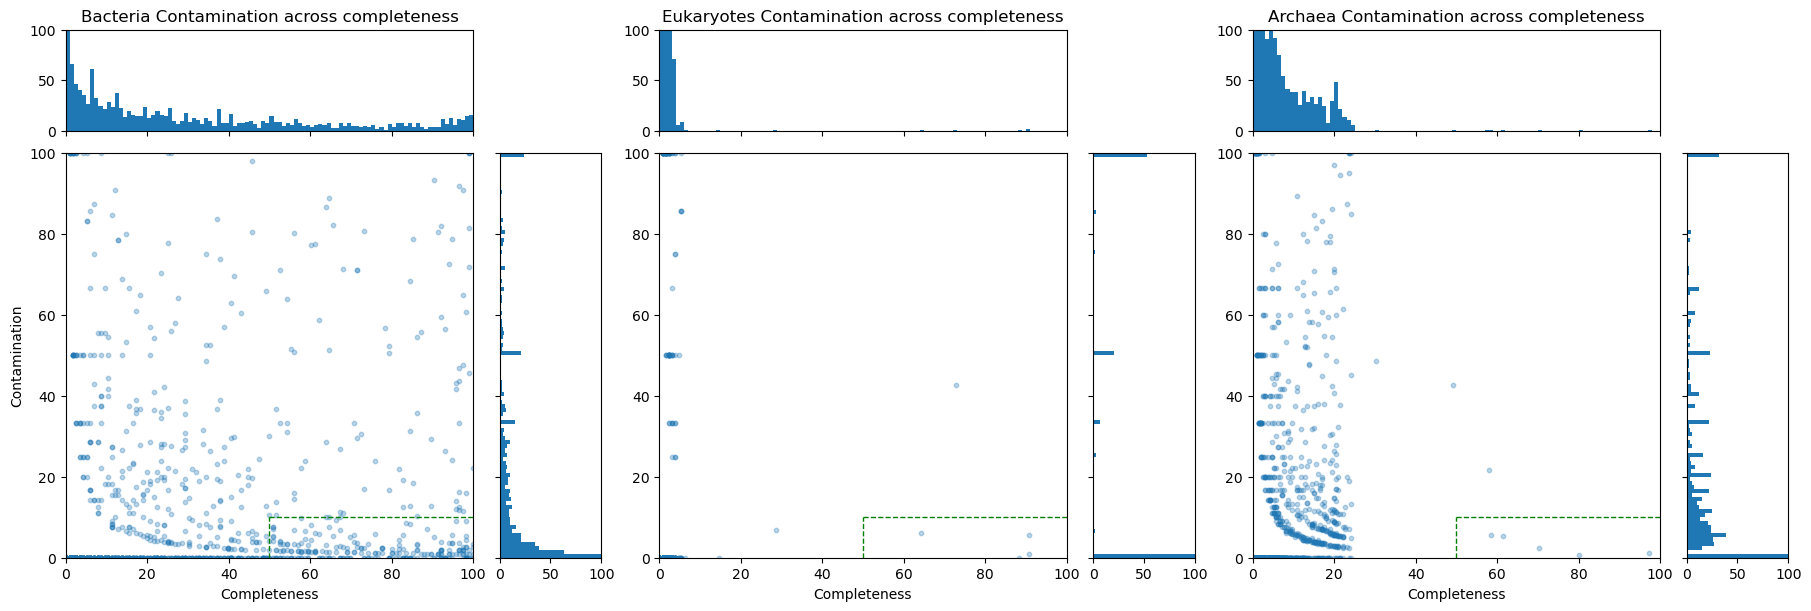

In [14]:
# Plot all 3 side by side
layout = [
    ['histx1', '.',      'histx2', '.',      'histx3', '.'],
    ['scatter1', 'histy1', 'scatter2', 'histy2', 'scatter3', 'histy3']
]


fig, axs = plt.subplot_mosaic(
    layout,
    figsize=(18, 6),
    width_ratios=[4,1]*3,   # repeats 3 times
    height_ratios=[1,4],
    layout='constrained'
)

# panel 1: Bacteria
scatter_hist(x_bacteria, y_bacteria, axs['scatter1'], axs['histx1'], axs['histy1'])
axs['scatter1'].plot([50,100],[10,10],'--',linewidth=1,color='green') #contamination threshold
axs['scatter1'].plot([50,50],[0,10],'--',linewidth=1,color='green')   #completeness threshold
axs['histx1'].set_title('Bacteria')

# panel 2: Eukariotes
scatter_hist(x_eukaria, y_eukaria, axs['scatter2'], axs['histx2'], axs['histy2'])
axs['scatter2'].plot([50,100],[10,10],'--',linewidth=1,color='green') #contamination threshold
axs['scatter2'].plot([50,50],[0,10],'--',linewidth=1,color='green')   #completeness threshold
axs['histx2'].set_title('Eukaryotes')

# panel 3: Archaea
scatter_hist(x_archaea, y_archaea, axs['scatter3'], axs['histx3'], axs['histy3'])
axs['scatter3'].plot([50,100],[10,10],'--',linewidth=1,color='green') #contamination threshold
axs['scatter3'].plot([50,50],[0,10],'--',linewidth=1,color='green')   #completeness threshold
axs['histx2'].set_title('Eukaryotes')

# axis labels
axs['scatter1'].set_xlabel("Completeness")
axs['scatter2'].set_xlabel("Completeness")
axs['scatter3'].set_xlabel("Completeness")
axs['scatter1'].set_ylabel("Contamination")
axs['histx1'].set_title('Bacteria Contamination across completeness')
axs['histx2'].set_title('Eukaryotes Contamination across completeness')
axs['histx3'].set_title('Archaea Contamination across completeness')
plt.show()